**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - Data Checkpoint

# Names

- Ryan Ding
- Alfernie Fabricante
- Grace Pei
- Brendan Kuang
- Clarence Chow

# Research Question

Which statistic most heavily influences an NBA player's salary at each given position? More specifically, is there some relationship between any single or combination of statistics and the amount in which an NBA player is paid?

## Background and Prior Work


- Include a general introduction to your topic
- Include explanation of what work has been done previously
- Include citations or links to previous work

This section will present the background and context of your topic and question in a few paragraphs. Include a general introduction to your topic and then describe what information you currently know about the topic after doing your initial research. Include references to other projects who have asked similar questions or approached similar problems. Explain what others have learned in their projects.

Find some relevant prior work, and reference those sources, summarizing what each did and what they learned. Even if you think you have a totally novel question, find the most similar prior work that you can and discuss how it relates to your project.

References can be research publications, but they need not be. Blogs, GitHub repositories, company websites, etc., are all viable references if they are relevant to your project. It must be clear which information comes from which references. (2-3 paragraphs, including at least 2 references)

 **Use inline citation through HTML footnotes to specify which references support which statements** 

For example: After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Use a minimum of 2 or 3 citations, but we prefer more.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) You need enough to fully explain and back up important facts. 

Note that if you click a footnote number in the paragraph above it will transport you to the proper entry in the footnotes list below.  And if you click the ^ in the footnote entry, it will return you to the place in the main text where the footnote is made.

To understand the HTML here, `<a name="#..."> </a>` is a tag that allows you produce a named reference for a given location.  Markdown has the construciton `[text with hyperlink](#named reference)` that will produce a clickable link that transports you the named reference.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.


# Hypothesis


We hypothesize that for each NBA position, there is at minimum one feature that contributes heavily to a player's salary.

For points guards, we believe that assist-per-game is the most important metric that helps to determine a player's salary. We rationalize this with the belief that since point guards are known for facilitating ball movement around the court, their ability to find other players to score baskets for them makes them valuable.

For shooting guards, we think that 3-point-percentage, or the percentage of shots made from behind the 3-point line, is the most important metric that determines a player's salary. This is because the position is geared towards scoring as many points as possible, and teams would want someone who is efficient in their shots and able to score from many positions on the floor.

For small forwards, we believe that their points-per-game is the most important metric in determining their salary. As the most versatile position on the floor, their overall scoring ability, from jumpshots to three-pointers, seems to be the most valued.

For power forwards, we claim that their field-goal-percentage is the most important factor in their salary. Playing closer to the basket, power forwards are notable for taking many jumpshots closer to the basket than that of their guard teammates. As a result, efficiency in these closer-range shots is kept most notable as it shows their offensive prowess at closer range than a shooting guard.

For centers, we believe that there are two metrics of equal importance: blocks-per-game and rebounds-per-game. Centers are known for being the tallest person on the floor and the most inclined to grab missed shots or block an opponent from scoring on their basket. As a result, both of these features are highly sought after from centers.

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: NBA Salaries from 2000-2020
  - Link to the dataset: https://github.com/erikgregorywebb/datasets/blob/master/nba-salaries.csv
  - Number of observations: 9457
  - Number of variables: 6

- Dataset #2
  - Dataset Name: NBA Player Salaries 2022-23
  - Link to the dataset: https://app.gigasheet.com/spreadsheet/nba-player-salaries-2022-23-season/44656fd5_6281_40aa_a81f_73275250d994
  - Number of observations: 467
  - Number of variables: 49

**Dataset #1**
This dataset lists a ranking of all NBA player's salary in a given season from the 2000 season all the way up to the 2020 season. There are six features that are included within each row, and each row corresponds to an observation of an NBA player in a given season. Features include: 
- NBA salary ranking relative to other players
- Player name
- Player position
- Player team
- Player salary
- Season

**Dataset #2**
This dataset lists the statistics of every player in the 2022-23 NBA season, including their salary and positions. The datatypes of this dataset consist of strings for names and positions, and numbers for everything else. To clean this dataset we removed the columns that were irrelevant to this project, such as each player's team.

## NBA Salaries from 2000-2020

Features:  Index(['rank', 'name', 'position', 'team', 'salary', 'season'], dtype='object')

Description of Data:
              rank        salary       season
count  9456.000000  9.456000e+03  9456.000000
mean    250.483714  4.486115e+06  2011.438029
std     159.477367  5.366191e+06     5.623698
min       1.000000  2.692000e+03  2000.000000
25%     113.000000  9.152430e+05  2007.000000
50%     238.000000  2.351330e+06  2012.000000
75%     374.000000  5.822036e+06  2016.000000
max     699.000000  4.023176e+07  2020.000000

The table itself!


,rank,name,position,team,salary,season
0,1,Shaquille O'Neal,C,Los Angeles Lakers,17142000,2000
1,2,Kevin Garnett,PF,Minnesota Timberwolves,16806000,2000
2,3,Alonzo Mourning,C,Miami Heat,15004000,2000
3,4,Juwan Howard,PF,Washington Wizards,15000000,2000
4,5,Scottie Pippen,SF,Portland Trail Blazers,14795000,2000
...,...,...,...,...,...,...
9451,524,Jimmer Fredette,G,Phoenix Suns,208509,2020
9452,525,Jontay Porter,PF,Memphis Grizzlies,197933,2020
9453,526,Anthony Tolliver,PF,Memphis Grizzlies,183115,2020
9454,527,Tyler Johnson,SG,Phoenix Suns,183115,2020



Different Player Positions and their Counts: position
C     1765
PF    1731
SG    1699
PG    1475
SF    1454
G      696
F      578
NA      57
GF       1
Name: count, dtype: int64
Our new countplot visual for positions!


<Axes: xlabel='position', ylabel='count'>

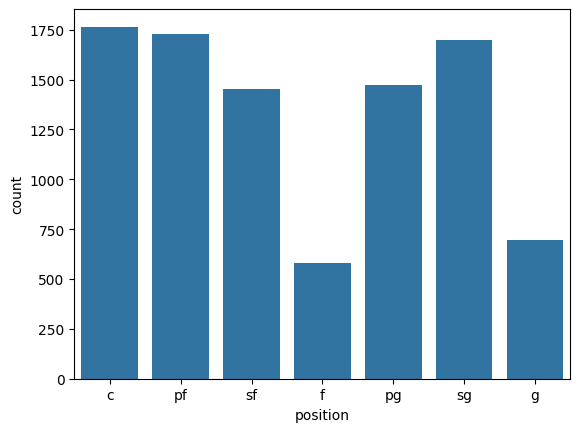

In [19]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('nba-salaries.csv')
features = df1.columns
print('Features: ', features)

print('\nDescription of Data:')
print(df1.describe())
print('\nThe table itself!')
display(df1)

print('\nDifferent Player Positions and their Counts:', df1['position'].value_counts())

# As can be seen by the data, we have lots of players who are not listed at one specific of the five positions
# For instance, some players are listed as forwards (meaning they either play small forward or power forward)
# Others are listed as guards (meaning either point guard or shooting guard)
# On top of this, there are players who are listed as NA, which we need to investigate, and a single GF?!?
# (Another note: there is a weird formatting error in which there is whitespace before position, we will also clean that up!)
who_is_gf = df1[df1['position']==' GF']
who_is_gf

# As we see, someone named Jiri Welsh is listed as the only GF in the file. Upon further investigation, he played both a guard and forward position
# Which makes sense as to why he is labelled as GF! However, based on the NBA website, he is listed as a forward and will be treated as such during
# analysis.
def standardize_position(str_in):
    str_in = str_in.strip()
    str_in = str_in.lower()
    if str_in == 'gf':
        str_in = 'f' # Context provided based solely on Jiri!
    return str_in

# We have, for the time being, fixed up the GF issue!
df1['position'] = df1['position'].apply(standardize_position)
df1['position'].value_counts()

# We have all these na values in the DataFrame! How are we going to clean it up?
all_na = df1[df1['position']=='na']
all_na

# Looking at just a few of the observations of an na player, it can be seen that reasons vary widely as to why
# they seem to be listed as an na position. For instance, Deron Washington, despite having a listed salary in 2013,
# played overseas that year. Another playing, Tu Holloway, had a brief G-League stint and also played overseas. As a
# result, instead of manually seeing what each player was doing and the fact that many of them were not in the NBA at the time
# it is easiest and most fitting to drop such players.
def drop_helper(str_in):
    str_in = str_in.lower()
    str_in = str_in.strip()
    if str_in == 'na':
        return None
    return str_in

df1['position'] = df1['position'].apply(drop_helper)
df1 = df1.dropna(subset='position')
df1['position'].value_counts()

print('Our new countplot visual for positions!')
sns.countplot(data=df1, x='position')

## NBA Player Salaries 2022-23

In [18]:
df2 = pd.read_csv('NBA_Player_Salaries_2022-23.csv')
df2 = df2.drop(['Unnamed: 0', 'Age', 'Team'], axis=1)
print("Number of variables:", df2.shape[1])
print("Number of observations:", df2.shape[0])
df2.head()

Number of variables: 49
Number of observations: 467


,Player Name,Salary,Position,GP,GS,MP,FG,FGA,FG%,3P,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Stephen Curry,48070014,PG,56,56,34.7,10.0,20.2,0.493,4.9,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,John Wall,47345760,PG,34,3,22.2,4.1,9.9,0.408,1.0,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,Russell Westbrook,47080179,PG,73,24,29.1,5.9,13.6,0.436,1.2,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,LeBron James,44474988,PF,55,54,35.5,11.1,22.2,0.500,2.2,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,Kevin Durant,44119845,PF,47,47,35.6,10.3,18.3,0.560,2.0,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


# Ethics & Privacy

* In our research of NBA players' salaries and the contributing factors that affect them, we have several ethical considerations, including biases, privacy, and terms of use . Our datasets may carry biases, such as the representation and data collection methods. For example, they might disproportionately represent star players or those have larger markets, skewing  the analysis towards higher salaries and therefore overlooking players having smaller markets.  Furthermore, the method of data collection and historical context might embed systemic biases into the datasets, such as disparities in pay due to factors unrelated to performance. 
* To address these challenges, we plan to employ a comprehensive approach to identify potential biases in our datasets. This includes statistical analysis to uncover overrepresentation or underrepresentation of certain groups, cross-referencing data from multiple sources to validate findings, and conducting sensitivity analyses to understand the impact of potential biases on our conclusions. Throughout the research process, we will be careful for biases, continuously assessing our data and methods for any signs of inequity. We will carefully review the terms of use of each dataset to ensure compliance with its guidelines. Our analysis will focus on aggregated data to minimize privacy risks, and any sensitive or potentially identifiable information will be treated with extreme care. We also consider the ethical implications of our findings and how they are communicated to ensure that we do not inadvertently compromise player privacy or misrepresent data.
* To ensure a fair analysis, we will strive to include a large variety of players in our research, taking into account variables such as position, tenure, and market size. This inclusivity helps reduce the risk of drawing conclusions that only reflect the experiences of the most visible or highest-paid players. By addressing these ethical issues, we aim to ensure that our research is responsible and produces insights that are not only valuable to understanding the NBA's salary dynamics, but also respect the privacy of the players represented in our dataset.

# Team Expectations 

* Open communication between group members; Respond promptly to messages
* Input and collaboration from all members on each aspect of the project
* Attend all scheduled meetings; Complete work assigned to be completed before meetings
* Remain flexible to any necessary changes to scheduling or task assignment
* Maintain previously stated ethical standards while working on the project
* Maintain high quality of work on all aspects of the project

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/11  | 12 PM  | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; complete Project Proposal | 
| 2/18  | 12 PM  |  Finish individual background research on topic; Search for datasets | Discuss ideal dataset(s) and ethics | 
| 2/25  | 12 PM  | Import & Wrangle Data (Alfernie) | Discuss analytical approaches; Complete Checkpoint #1  |
| 3/03  | 12 PM  | EDA (Clarence) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 3/10  | 12 PM  | Finalize wrangling/EDA; Begin Analysis (Grace; Brendan) | Discuss/edit Analysis; Complete Checkpoint #2 |
| 3/17  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Ryan)| Discuss/edit full project; Assign final tasks |
| 3/20  | 12 PM  | Hopefully full project finished | Turn in Final Project & Group Project Surveys |